## Importando Bibliotecas

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action='ignore')

## Leitura de Dados e Visualização de Conteúdo

In [31]:
df = pd.read_csv('games.csv')

In [32]:
df.head()

,id,metascore,platform,release_date,sort_no,summary,title,user_score
0,543718,91,PC,"August 18, 2020",301,"From light planes to wide-body jets, fly highl...",Microsoft Flight Simulator,7.1
1,555108,91,PC,"December 8, 2022",302,"Take up your sword, channel your magic or boar...",Chained Echoes,8.7
2,106820,91,PlayStation 2,"November 7, 2005",303,"Strap on your Guitar Hero SG controller, plug-...",Guitar Hero,8.5
3,110775,91,PC,"November 13, 2008",304,"Players last visited Northrend in ""Warcraft II...",World of Warcraft: Wrath of the Lich King,7.7
4,142864,91,Wii,"October 26, 2010",305,Rock Band returns with the third iteration of ...,Rock Band 3,6.8


In [33]:
df.shape

(20022, 8)

In [34]:
df.dtypes

id               int64
metascore        int64
platform        object
release_date    object
sort_no          int64
summary         object
title           object
user_score      object
dtype: object

In [35]:
df['metascore'] = pd.to_numeric(df['metascore'],downcast='float')
df['user_score'] = df['user_score'].str.replace('tbd', '')
df['user_score'] = pd.to_numeric(df['user_score'],downcast='float') * 10

In [36]:
df['yearstg'] = df['release_date'].str[-4:]
df['yearint'] = df['yearstg'].astype(int)
df['age'] = 2023 - df['yearint']

In [37]:
#salvando os dados do dataframe em um arquivo csv
df.to_csv('games_analiseexpl.csv', index=False)

## Visualização de Dados

In [38]:
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    "MetaScore", "UserScore", "Plataforma", "Idade"))

fig.add_trace(
    go.Histogram(x=df['metascore'], name="nota críticos"),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df['user_score'], name="nota players"),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df['platform'], name="plataforma"),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=df['age'], name="idade (anos)"),
    row=2, col=2
)


fig.update_layout(height=500, width=800, title_text="Distribuição de notas")
fig.show()


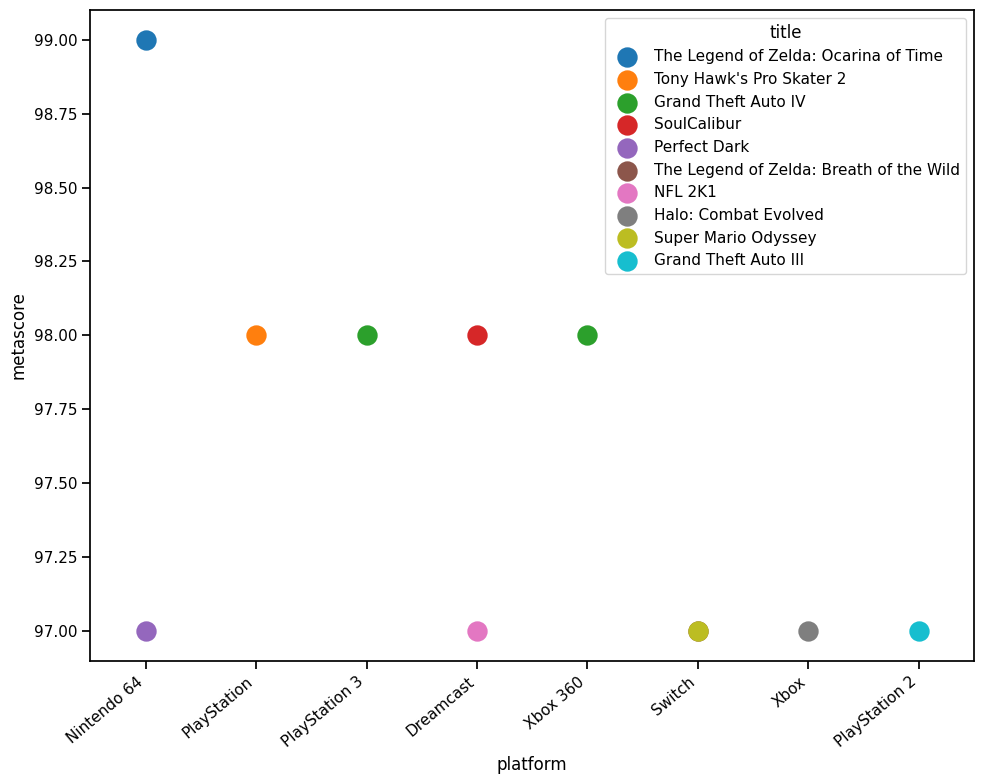

In [39]:
#gráfico dos 11 jogos com melhor nota com relação as plataformas
plt.figure(figsize=(10,8))

df= df.sort_values(by ='metascore' , ascending=False)
df2=df.head(11)
ax=sns.pointplot(data=df2,x='platform',y='metascore',hue='title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Preparação de Dados

Correlação de Variáveis

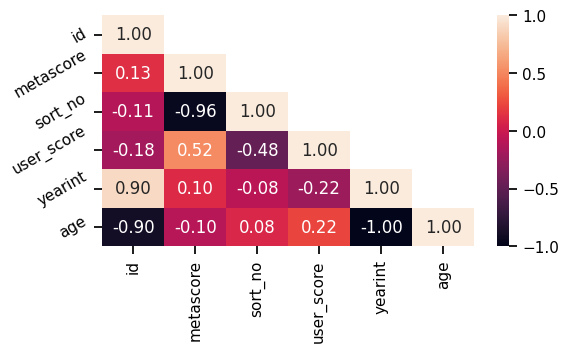

In [40]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(6,3))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Checagem de duplicados

In [41]:
df['id'].duplicated().sum()

0

Remoção de Colunas

In [42]:
df.drop(columns=['yearstg','yearint','release_date','sort_no','summary','title','id'],axis=1,inplace=True)

Remoção de NaNs

In [43]:
df.isna().sum()

metascore        0
platform         0
user_score    1382
age              0
dtype: int64

In [44]:
# Optado manter as entradas sem user score, copiando o metascore para o mesmo
df['user_score'].fillna(df['metascore'],inplace=True)
df.isna().sum()

metascore     0
platform      0
user_score    0
age           0
dtype: int64

In [45]:
df['platform'].value_counts()

PC                  5276
PlayStation 4       2122
Switch              1691
Xbox 360            1665
PlayStation 2       1421
PlayStation 3       1265
Xbox One            1201
Xbox                 794
DS                   728
Wii                  663
PSP                  514
GameCube             452
Game Boy Advance     442
3DS                  398
PlayStation 5        334
PlayStation Vita     258
Xbox Series X        222
PlayStation          189
Wii U                186
Dreamcast            125
Nintendo 64           71
Stadia                 5
Name: platform, dtype: int64

In [46]:
#categorizando os valores de metascore
df['binned_metascore']=pd.cut(df['metascore'], bins=[0,40,60,80,100], right=True, labels=False)+1

In [47]:
#criando novas colunas para transformar os valores categóricos de 'platform' (plataforma)
#em valores numéricos
df = pd.get_dummies(data = df, columns=['platform'], prefix=['platform'], drop_first=True)

In [48]:
df.to_csv('games_com_notabinada.csv', index=False)

## Engenharia de Recursos

In [49]:
list(df.columns)

['metascore',
 'user_score',
 'age',
 'binned_metascore',
 'platform_DS',
 'platform_Dreamcast',
 'platform_Game Boy Advance',
 'platform_GameCube',
 'platform_Nintendo 64',
 'platform_PC',
 'platform_PSP',
 'platform_PlayStation',
 'platform_PlayStation 2',
 'platform_PlayStation 3',
 'platform_PlayStation 4',
 'platform_PlayStation 5',
 'platform_PlayStation Vita',
 'platform_Stadia',
 'platform_Switch',
 'platform_Wii',
 'platform_Wii U',
 'platform_Xbox',
 'platform_Xbox 360',
 'platform_Xbox One',
 'platform_Xbox Series X']

In [50]:
#escolhendo as colunas do dataframe que serão nossos valores de entrada para o modelo
X=pd.DataFrame(columns=['user_score','age','platform_DS','platform_Dreamcast',
                        'platform_Game Boy Advance','platform_GameCube','platform_Nintendo 64','platform_PC','platform_PSP',
                        'platform_PlayStation','platform_PlayStation 2','platform_PlayStation 3',
                        'platform_PlayStation 4','platform_PlayStation 5',
                        'platform_PlayStation Vita','platform_Stadia','platform_Switch',
                        'platform_Wii','platform_Wii U','platform_Xbox',
                        'platform_Xbox 360','platform_Xbox One','platform_Xbox Series X',],data=df)

In [51]:
#escolhendo a(s) coluna(s) do dataframe que serão a resposta do modelo
y = pd.DataFrame(columns=['binned_metascore'], data=df)

In [52]:
#importando o pacote de divisão dos dados em treinamento e teste
from sklearn.model_selection import train_test_split

In [53]:
#dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
#normalizando os dados
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# **Machine Learning**

In [55]:
#importando, configurando e treinando o modelo de regressão 
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression(verbose=0, max_iter=1000)
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

In [56]:
#verificando os valores preditos
y_pred

array([3, 3, 3, ..., 3, 3, 2])

In [57]:
#importando o pacote de métricas e calculando a matriz de confusão
from sklearn import metrics
cnf_matrix =  metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[  17   66   35    0]
 [  16  226  711    7]
 [   8  142 3334  176]
 [   0   13 1001  255]]


In [58]:
#verificando quantos valores existem de cada categoria em 'binned_metascore'
df['binned_metascore'].value_counts()

3    12055
4     4280
2     3269
1      418
Name: binned_metascore, dtype: int64

In [59]:
#métricas finais
print(metrics.classification_report(y_test, y_pred, target_names=['1','2', '3', '4']))

              precision    recall  f1-score   support

           1       0.41      0.14      0.21       118
           2       0.51      0.24      0.32       960
           3       0.66      0.91      0.76      3660
           4       0.58      0.20      0.30      1269

    accuracy                           0.64      6007
   macro avg       0.54      0.37      0.40      6007
weighted avg       0.61      0.64      0.58      6007



In [60]:
#importação do pacote para salvar o modelo
import pickle

In [61]:
#definindo em qual caminho vamos salvar o modelo
modelo_treinado = 'modelo_games.sav'

In [63]:
#salvando o modelo
pickle.dump(lr, open(modelo_treinado, 'wb'))

In [64]:
#carregando o modelo treinado
modelo_carregado = pickle.load(open(modelo_treinado, 'rb'))

In [65]:
#Olhando o conteúdo de um vetor de teste
X_test[0]

array([ 0.50705264,  1.04992331, -0.18993682, -0.080394  , -0.15432026,
       -0.14965187, -0.05675551,  1.69047134, -0.16097572, -0.09898978,
       -0.27853111, -0.26009005, -0.34348248, -0.13058982, -0.11502257,
       -0.01463223, -0.3079551 , -0.18750385, -0.10117168, -0.20076309,
       -0.30236716, -0.2552087 , -0.10914833])

In [66]:
#fazendo predição do novo dado com o modelo carregado
modelo_carregado.predict([X_test[777]])

array([2])